In [2]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [3]:
data = pd.read_csv('project_data.csv')

In [16]:
data.describe()

,user_id,Is_Filler,Is_Rel,Is_Inter,Required_to_Switch,experiment_device_factor,fi1,fi2,fi3,fi4,...,gender_calc,age_group,device_type_calc,open_close_space,private_public_space,large_small_space,noisy_quiet_space,dark_bright_space,crowded_space,Duration_Time_Seconds
count,459.000000,459.000000,370.000000,370.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,...,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,552092.509804,0.806100,0.486486,0.500000,0.398693,1.991285,4.387800,5.272331,5.272331,5.078431,...,1.230937,32.150327,2.165577,3.433551,3.220044,4.453159,3.215686,3.799564,3.187364,430.021786
std,263807.055479,0.395783,0.500494,0.500677,0.490164,0.820008,2.244339,1.473906,1.504693,1.547767,...,0.427036,8.326134,1.168562,2.278973,2.223719,1.532574,2.037662,1.912702,2.113528,310.768128
min,101789.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000
25%,328478.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,5.000000,4.000000,...,1.000000,27.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,236.500000
50%,569867.000000,1.000000,0.000000,0.500000,0.000000,2.000000,5.000000,6.000000,6.000000,5.000000,...,1.000000,30.000000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000,2.000000,340.000000
75%,776890.000000,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,6.000000,6.000000,...,1.000000,34.500000,3.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,501.000000
max,998560.000000,1.000000,1.000000,1.000000,1.000000,3.000000,7.000000,7.000000,7.000000,7.000000,...,3.000000,69.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2370.000000


## Experiment Duration By Device

In [17]:
data['Duration_Time_Seconds'].describe()

count     459.000000
mean      430.021786
std       310.768128
min        87.000000
25%       236.500000
50%       340.000000
75%       501.000000
max      2370.000000
Name: Duration_Time_Seconds, dtype: float64

In [22]:
mobile_devices = data[data['experiment_device'] == 'mobile']
desktop_devices = data[data['experiment_device']=='desktop']
laptop_devices = data[data['experiment_device']=='laptop']

In [19]:
describe_duration = {}
describe_duration['mobile'] = mobile_devices['Duration_Time_Seconds'].describe()
describe_duration['desktop'] = desktop_devices['Duration_Time_Seconds'].describe()
describe_duration['laptop'] = laptop_devices['Duration_Time_Seconds'].describe()

pd.DataFrame(describe_duration)

,mobile,desktop,laptop
count,152.000000,156.000000,151.000000
mean,493.986842,369.474359,428.185430
std,345.496437,277.146787,295.609346
min,127.000000,87.000000,113.000000
25%,272.750000,201.750000,239.500000
50%,387.500000,296.500000,348.000000
75%,580.000000,436.500000,489.500000
max,2370.000000,1875.000000,1606.000000


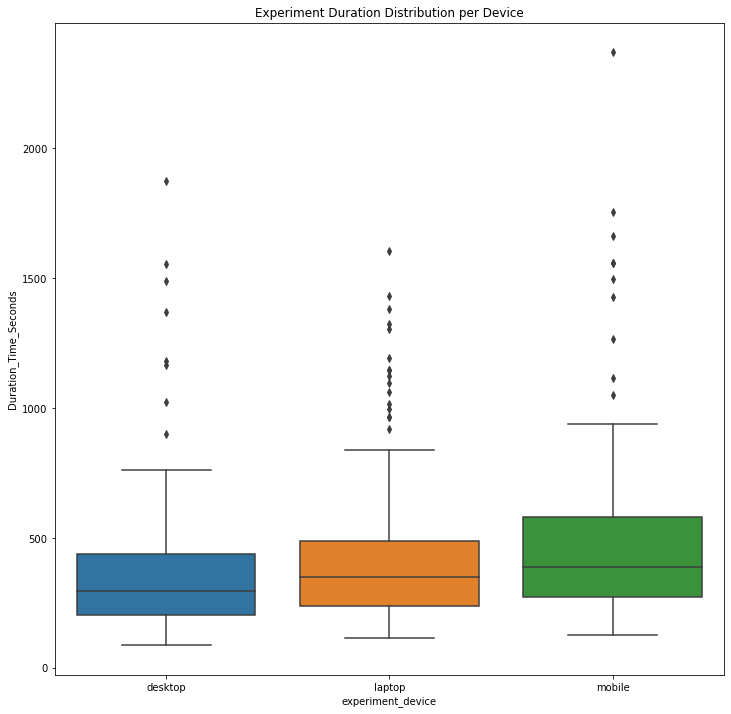

In [20]:
plt.figure(figsize=(12,12))
plt.title('Experiment Duration Distribution per Device')
sns.boxplot(y=data['Duration_Time_Seconds'],x=data['experiment_device'])

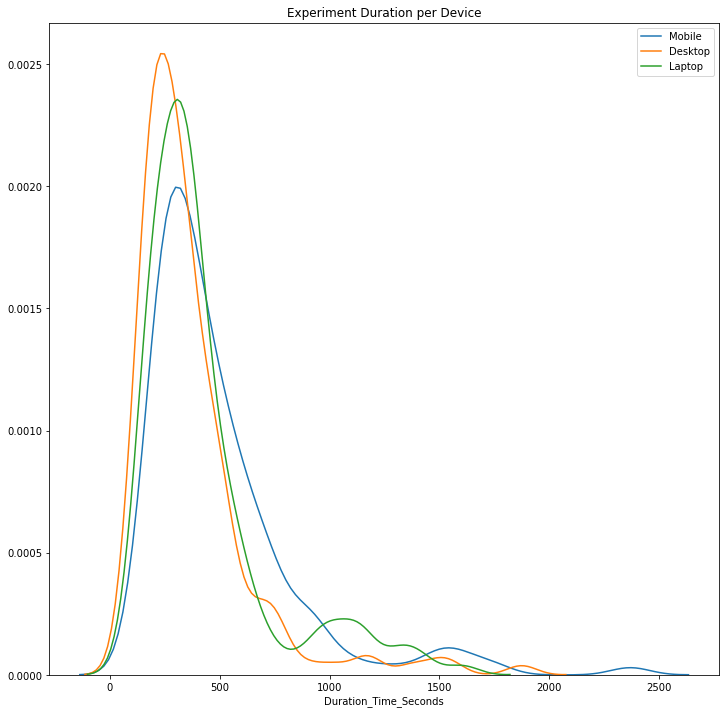

In [21]:
plt.figure(figsize=(12,12))
plt.title('Experiment Duration per Device')
sns.distplot(mobile_devices['Duration_Time_Seconds'], hist = False, label = 'Mobile')
sns.distplot(desktop_devices['Duration_Time_Seconds'], hist = False, label = 'Desktop')
sns.distplot(laptop_devices['Duration_Time_Seconds'], hist = False, label = 'Laptop')



Main Conclusion here is that the duration it took to the mobile testers to finish the experiment was longer than desktop testers. In can be indiced though to outliers in Mobile population.

## Envrionment Variables by Device

In [22]:
data['Sum_Env'] = data['open_close_space'] + data['private_public_space']+data['large_small_space']+data['noisy_quiet_space']+data['dark_bright_space']+data['crowded_space']

In [69]:
mobile_devices = data[data['experiment_device'] == 'mobile']
desktop_devices = data[data['experiment_device']=='desktop']
laptop_devices = data[data['experiment_device']=='laptop']

In [71]:
describe_env = {}
describe_env['mobile'] = mobile_devices['Sum_Env'].describe()
describe_env['desktop'] = desktop_devices['Sum_Env'].describe()
describe_env['laptop'] = laptop_devices['Sum_Env'].describe()

pd.DataFrame(describe_env)

,mobile,desktop,laptop
count,152.000000,156.000000,151.000000
mean,19.723684,23.852564,20.278146
std,9.739792,10.948445,9.294557
min,6.000000,6.000000,8.000000
25%,12.000000,13.750000,12.000000
50%,16.000000,24.500000,19.000000
75%,28.250000,33.000000,27.000000
max,42.000000,42.000000,42.000000


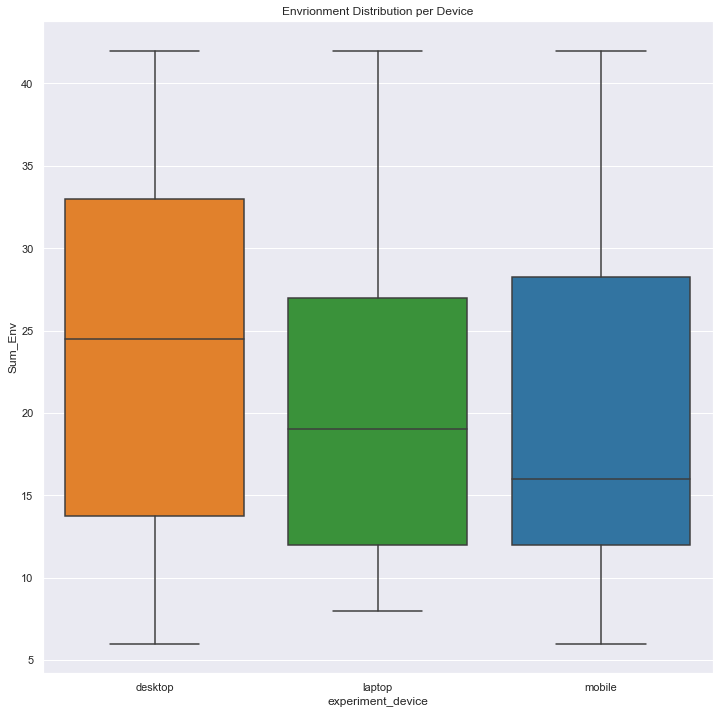

In [105]:
plt.figure(figsize=(12,12))
plt.title('Envrionment Distribution per Device')
sns.boxplot(y=data['Sum_Env'],x=data['experiment_device'], palette={'desktop': 'tab:orange', 'laptop': 'tab:green', 'mobile': 'tab:blue'})

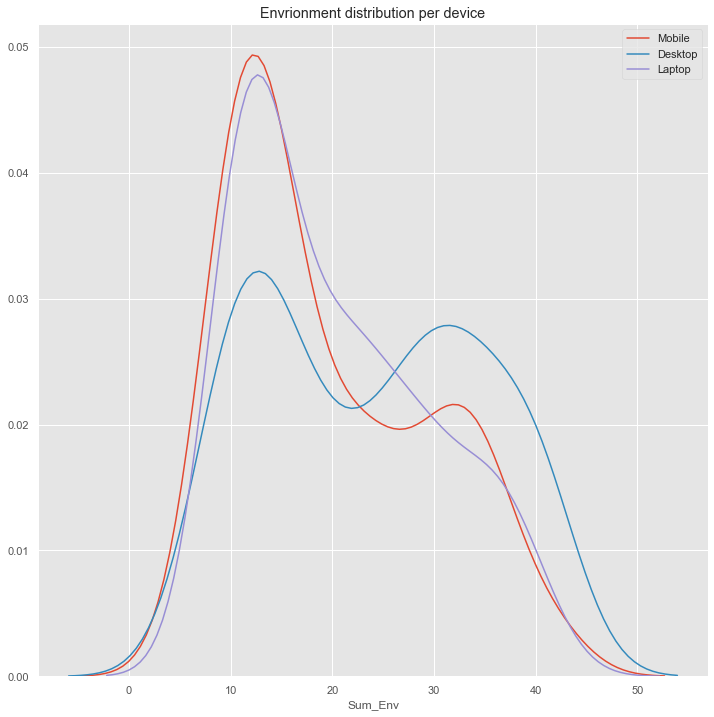

In [115]:
plt.figure(figsize=(12,12))
plt.style.use('ggplot')
plt.title('Envrionment distribution per device')
sns.distplot(mobile_devices['Sum_Env'], hist = False, label = 'Mobile')
sns.distplot(desktop_devices['Sum_Env'], hist = False, label = 'Desktop')
sns.distplot(laptop_devices['Sum_Env'], hist = False, label = 'Laptop')

As for the envrionmental measures, the laptop and mobile populations looked similar, while desktop testers looks significantly different. That means that desktop users have done the experiment in a far more calm envrionment.

## Population Distribution

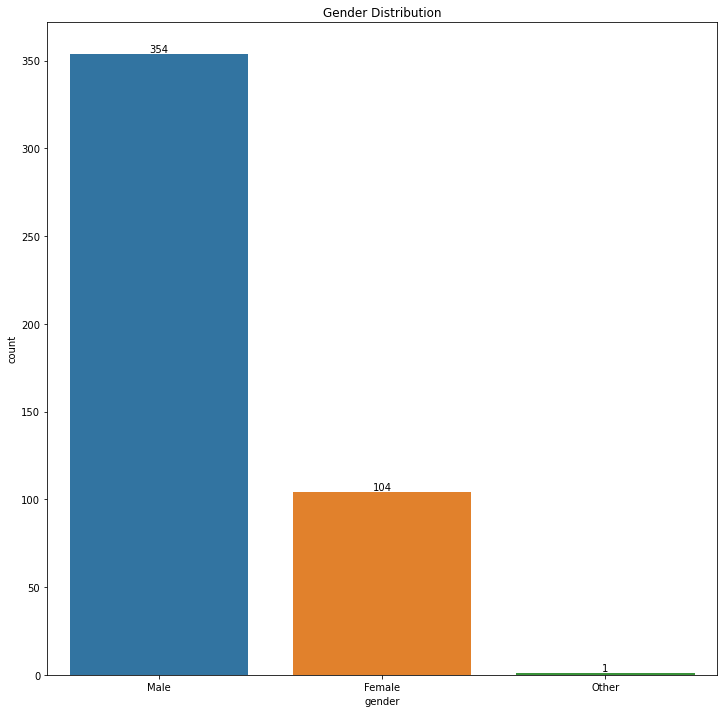

In [92]:
plt.figure(figsize=(12,12))
plt.title("Gender Distribution")
ax = sns.countplot(x=data['gender'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

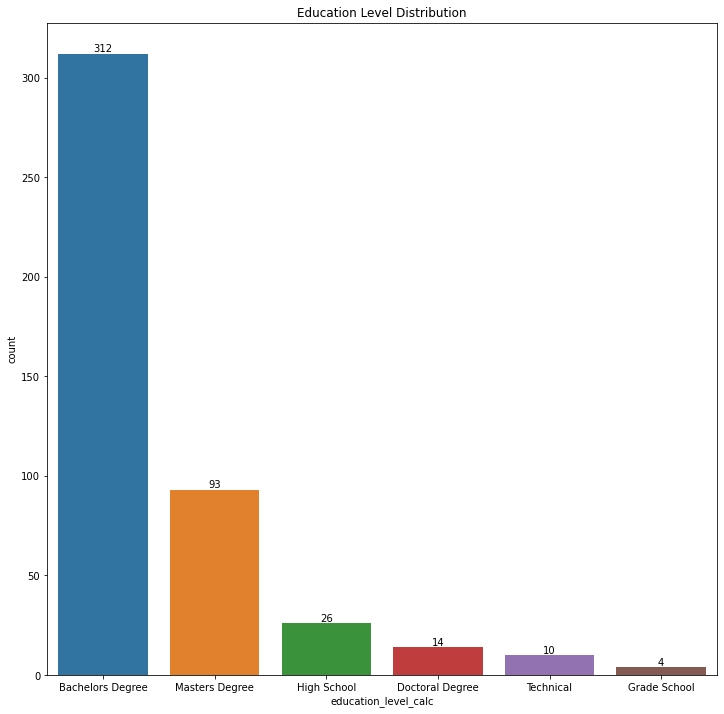

In [94]:
descending_order = data['education_level_calc'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(12,12))
plt.title("Education Level Distribution")
ax = sns.countplot(x=data['education_level_calc'], order=descending_order)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

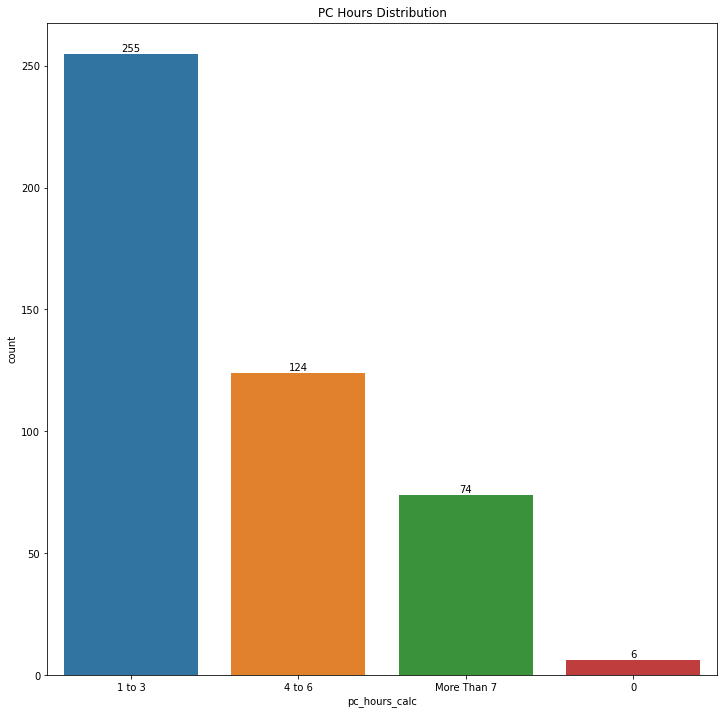

In [96]:
descending_order = data['pc_hours_calc'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(12,12))
plt.title("PC Hours Distribution")
ax = sns.countplot(x=data['pc_hours_calc'], order=descending_order)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

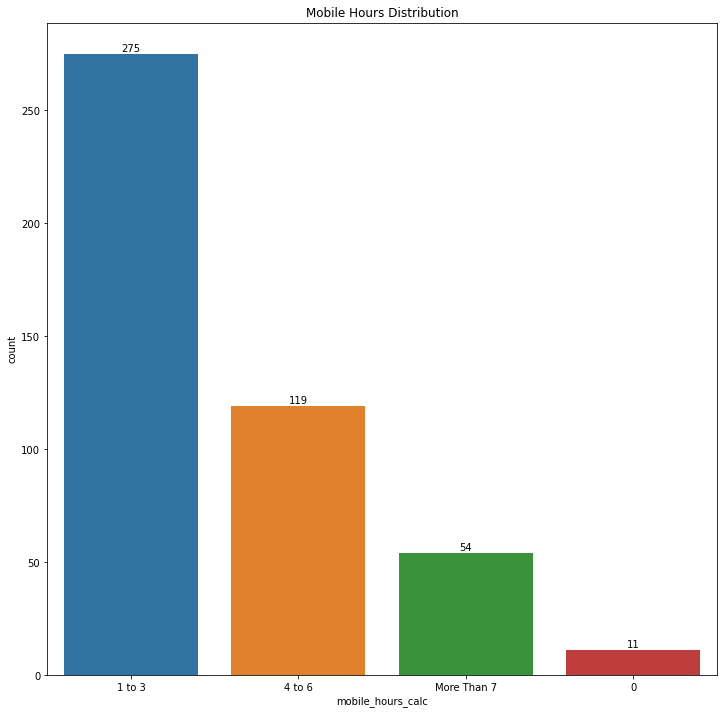

In [97]:
descending_order = data['mobile_hours_calc'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(12,12))
plt.title("Mobile Hours Distribution")
ax = sns.countplot(x=data['mobile_hours_calc'], order=descending_order)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

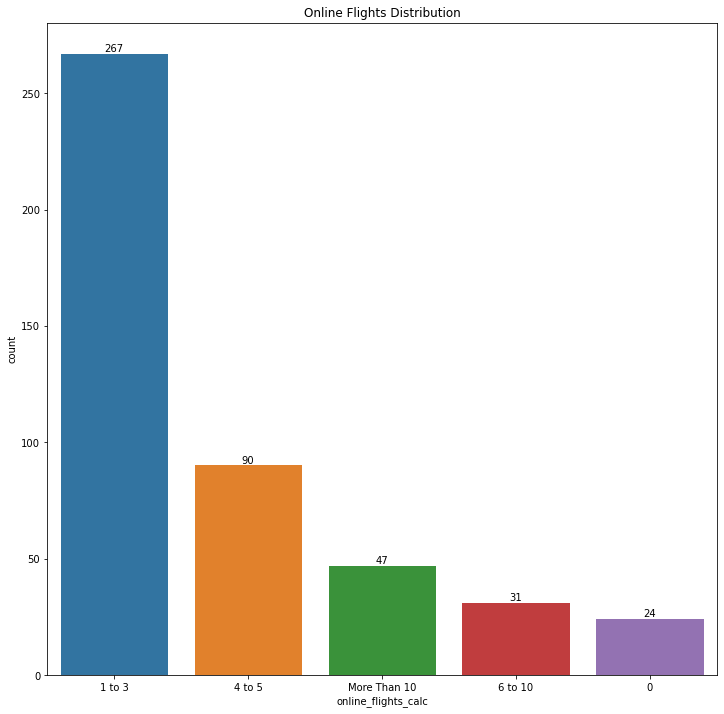

In [98]:
descending_order = data['online_flights_calc'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(12,12))
plt.title("Online Flights Distribution")
ax = sns.countplot(x=data['online_flights_calc'], order=descending_order)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

In [101]:
data['age_group'].describe()

count    459.000000
mean      32.150327
std        8.326134
min       18.000000
25%       27.000000
50%       30.000000
75%       34.500000
max       69.000000
Name: age_group, dtype: float64

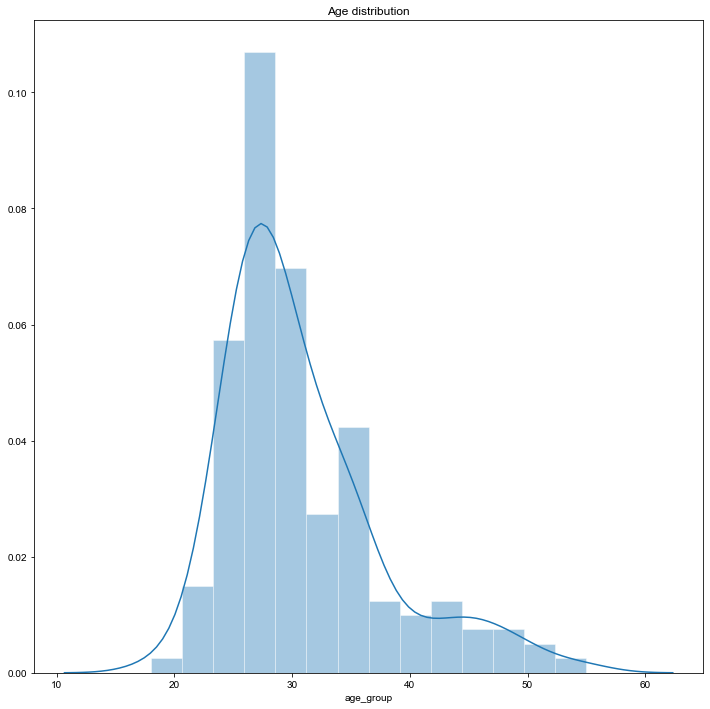

In [103]:
plt.figure(figsize=(12,12))
plt.title('Age distribution')
sns.set()
sns.distplot(mobile_devices['age_group'])

## Dependant Variables Distribution

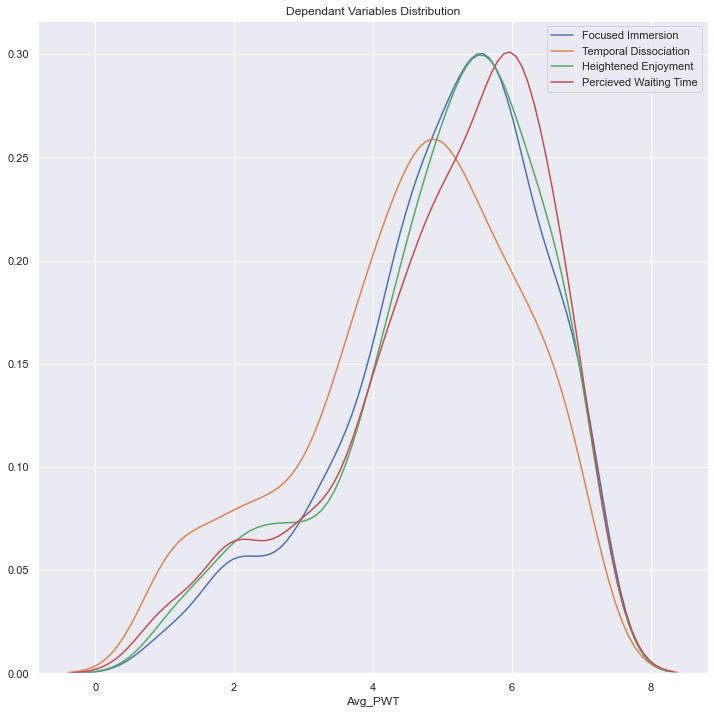

In [113]:
data['Avg_FI'] = data['Sum_FI'] / 4
data['Avg_TD'] = data['Sum_TD'] / 5
data['Avg_HE'] = data['Sum_HE'] / 4
data['Avg_PWT'] = data['Sum_PWT'] / 3

plt.figure(figsize=(12,12))
plt.title('Dependant Variables Distribution')
sns.distplot(data['Avg_FI'], hist = False, label = 'Focused Immersion')
sns.distplot(data['Avg_TD'], hist = False, label = 'Temporal Dissociation')
sns.distplot(data['Avg_HE'], hist = False, label = 'Heightened Enjoyment')
sns.distplot(data['Avg_PWT'], hist = False, label = 'Percieved Waiting Time')

In [122]:
mobile_devices = data[data['experiment_device'] == 'mobile']
desktop_devices = data[data['experiment_device']=='desktop']
laptop_devices = data[data['experiment_device']=='laptop']

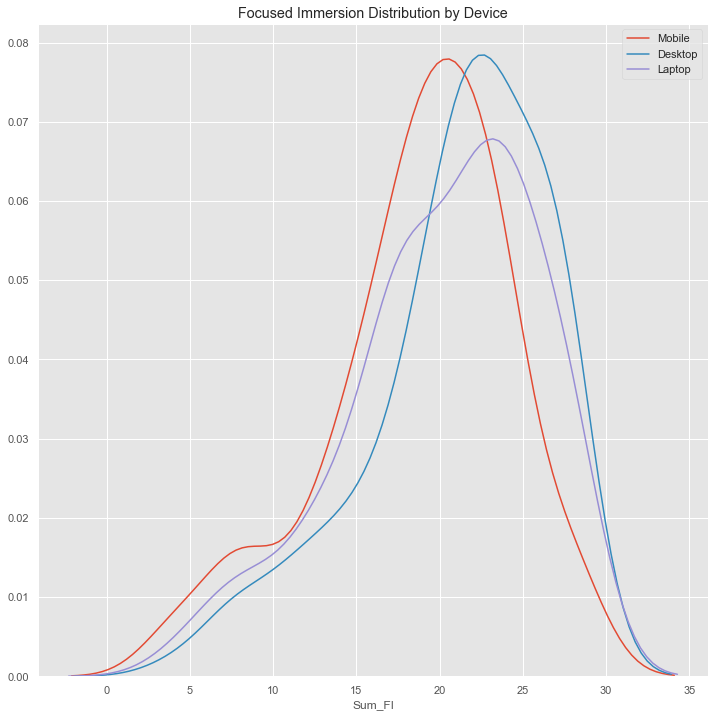

In [129]:
plt.figure(figsize=(12,12))
plt.title('Focused Immersion Distribution by Device')
sns.distplot(mobile_devices['Sum_FI'], hist = False, label = 'Mobile')
sns.distplot(desktop_devices['Sum_FI'], hist = False, label = 'Desktop')
sns.distplot(laptop_devices['Sum_FI'], hist = False, label = 'Laptop')

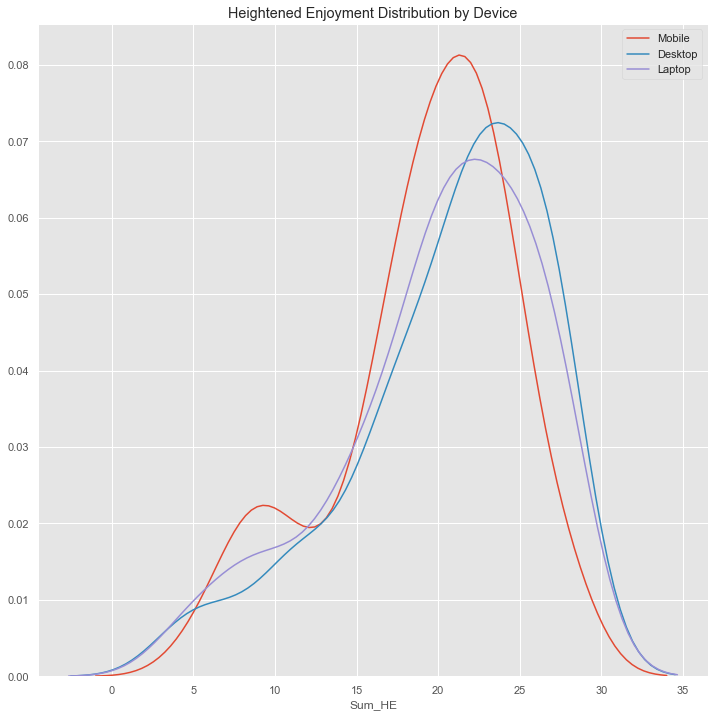

In [130]:
plt.figure(figsize=(12,12))
plt.title('Heightened Enjoyment Distribution by Device')
sns.distplot(mobile_devices['Sum_HE'], hist = False, label = 'Mobile')
sns.distplot(desktop_devices['Sum_HE'], hist = False, label = 'Desktop')
sns.distplot(laptop_devices['Sum_HE'], hist = False, label = 'Laptop')

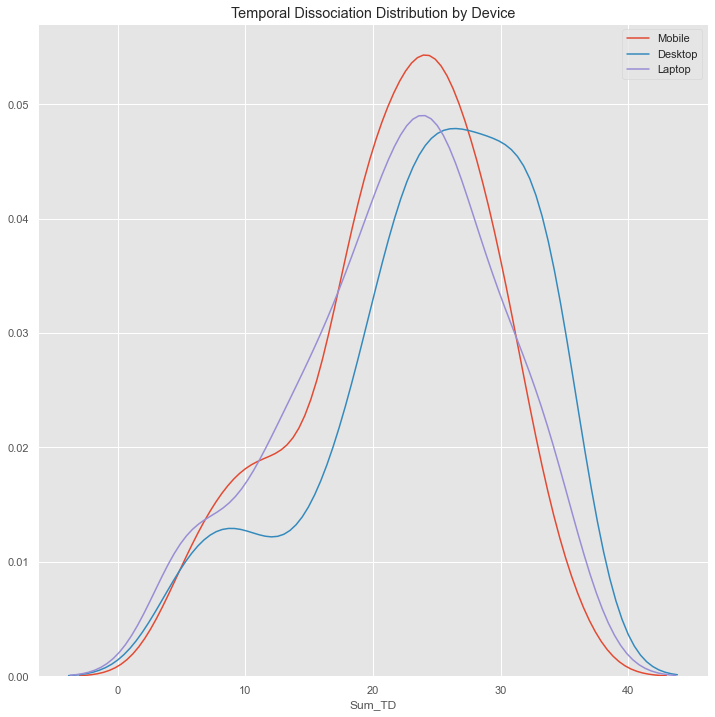

In [131]:
plt.figure(figsize=(12,12))
plt.title('Temporal Dissociation Distribution by Device')
sns.distplot(mobile_devices['Sum_TD'], hist = False, label = 'Mobile')
sns.distplot(desktop_devices['Sum_TD'], hist = False, label = 'Desktop')
sns.distplot(laptop_devices['Sum_TD'], hist = False, label = 'Laptop')

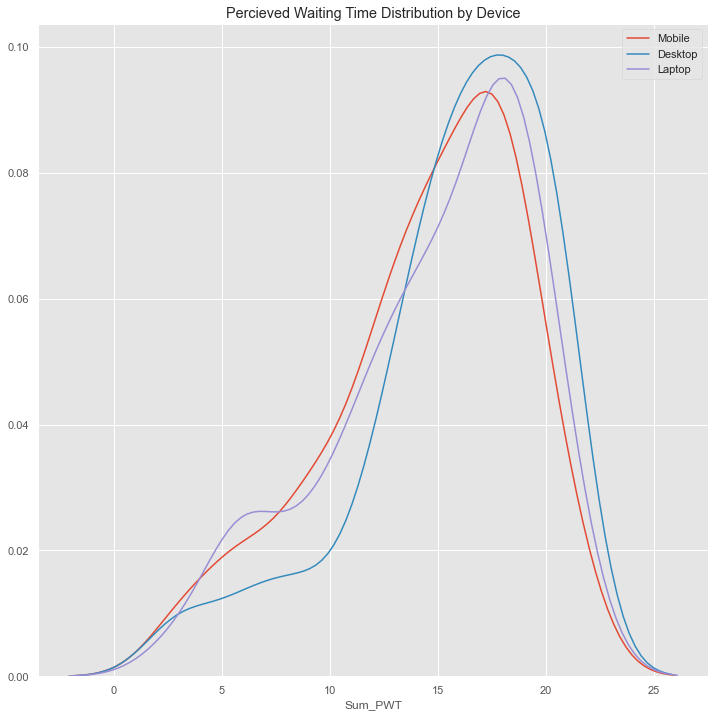

In [132]:
plt.figure(figsize=(12,12))
plt.title('Percieved Waiting Time Distribution by Device')
sns.distplot(mobile_devices['Sum_PWT'], hist = False, label = 'Mobile')
sns.distplot(desktop_devices['Sum_PWT'], hist = False, label = 'Desktop')
sns.distplot(laptop_devices['Sum_PWT'], hist = False, label = 'Laptop')

## Box Plots

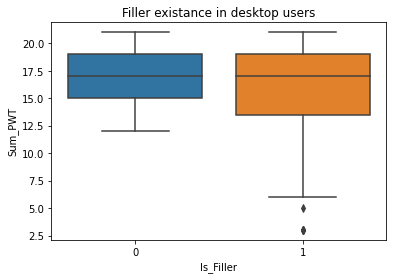

In [44]:
plt.title('Filler existance in desktop users')
sns.boxplot(x=desktop_devices['Is_Filler'], y=desktop_devices['Sum_PWT'])

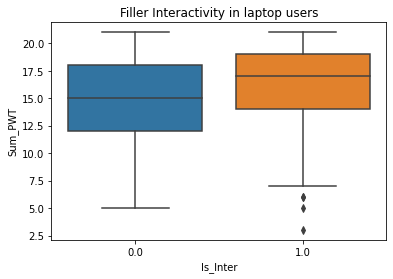

In [7]:
plt.title('Filler Interactivity in laptop users')
sns.boxplot(x=laptop_devices['Is_Inter'], y=laptop_devices['Sum_PWT'])

In [10]:

data['answers_variance'] = data[['fi1','fi2','fi3','fi4', 'td1', 'td2', 'td3', 'td4', 'td5', 'he1', 'he2', 'he3', 'he4', 'pwt1', 'pwt2', 'pwt3']].var(axis = 1)

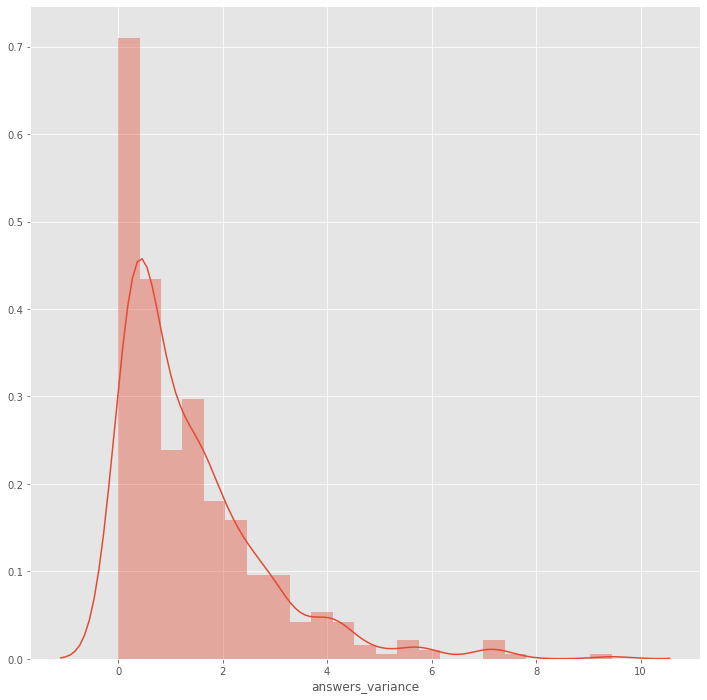

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
sns.distplot(data['answers_variance'], hist = True)

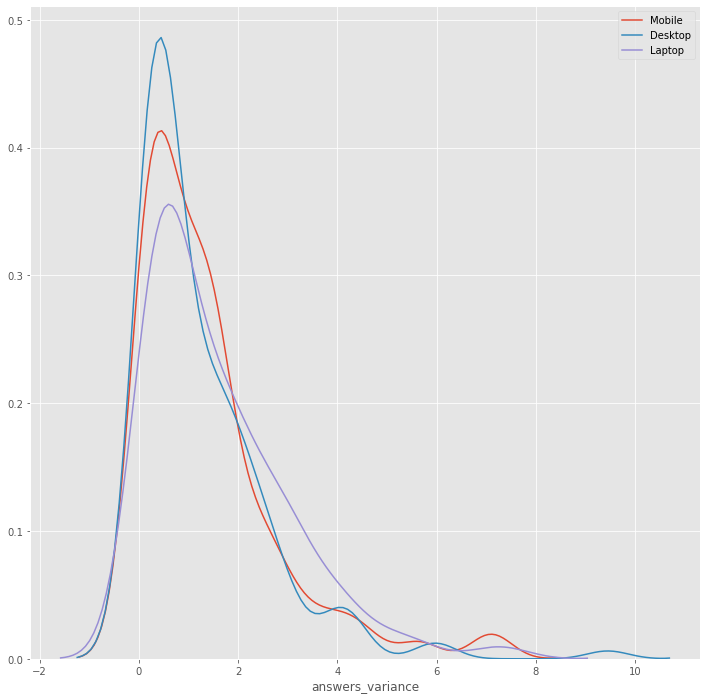

In [23]:
plt.figure(figsize=(12,12))
sns.distplot(mobile_devices['answers_variance'], hist = False, label='Mobile')
sns.distplot(desktop_devices['answers_variance'], hist = False, label='Desktop')
sns.distplot(laptop_devices['answers_variance'], hist = False, label='Laptop')

In [12]:
only_variance_data = data[data['answers_variance'] > 0]

In [16]:
only_variance_data.to_csv('only_variance_data.csv', index = False)

In [19]:
mobile_devices_only_var = only_variance_data[only_variance_data['experiment_device'] == 'mobile']
desktop_devices_only_var = only_variance_data[only_variance_data['experiment_device']=='desktop']
laptop_devices_only_var = only_variance_data[only_variance_data['experiment_device']=='laptop']

In [ ]:
describe_ = {}
describe_duration['mobile'] = mobile_devices_only_var['answers_variance'].describe()
describe_duration['desktop'] = desktop_devices_only_var['answers_variance'].describe()
describe_duration['laptop'] = laptop_devices_only_var['answers_variance'].describe()

pd.DataFrame(describe_duration)